In [4]:
!nvidia-smi

Fri Oct 25 01:02:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [8]:
!pip install roboflow -q
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 21.0 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="pEW4ejQrgMuyXc6bqcmR")
project = rf.workspace("sebastian-5vpki").project("avance5")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Avance5-1 in yolov8:: 100%|██████████| 1307/1307 [00:00<00:00, 5823.11it/s]


## Custom Training

In [9]:
%cd {HOME}
from ultralytics import YOLO

model = YOLO("yolov8s.pt")


results  = model.train(data=f"{dataset.location}/data.yaml",epochs=100,  imgsz=640)

 #task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 162MB/s] 


Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Avance5-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 21.2MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 82.4MB/s]


AMP: checks passed ✅


train: Scanning /content/Avance5-1/train/labels... 534 images, 46 backgrounds, 0 corrupt: 100%|██████████| 534/534 [00:00<00:00, 1968.55it/s]

train: New cache created: /content/Avance5-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Avance5-1/valid/labels... 76 images, 5 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<00:00, 1422.66it/s]

val: New cache created: /content/Avance5-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.08G     0.9938      2.138      1.013         19        640: 100%|██████████| 34/34 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.16s/it]

                   all         76        149        0.9      0.946      0.945      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.09G     0.8631     0.7712      0.985         17        640: 100%|██████████| 34/34 [00:10<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         76        149      0.161      0.846      0.155      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.06G      0.875     0.7025          1         15        640: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         76        149        0.7      0.866      0.701      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.05G     0.8427     0.6842      0.997         14        640: 100%|██████████| 34/34 [00:12<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         76        149       0.84       0.96       0.94      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.02G     0.8454     0.6178     0.9963         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


                   all         76        149      0.253      0.799      0.377      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.05G     0.8238     0.5792     0.9907         20        640: 100%|██████████| 34/34 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         76        149      0.804      0.866      0.881      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         4G     0.7902     0.5725     0.9838         13        640: 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         76        149      0.717      0.799      0.852      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.88G     0.7622     0.5549     0.9539         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         76        149      0.861      0.966      0.953      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         4G     0.7545     0.5241     0.9642         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all         76        149      0.892      0.966      0.942      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.89G     0.7584     0.5314     0.9641         19        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         76        149      0.916      0.966      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.02G      0.723     0.5048     0.9524         23        640: 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         76        149      0.902      0.986      0.972      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.05G     0.7322     0.4889     0.9533         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         76        149      0.899      0.987      0.966      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.02G     0.7197      0.502     0.9418         17        640: 100%|██████████| 34/34 [00:16<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         76        149      0.895      0.976      0.963      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.89G     0.6837     0.4773     0.9346         14        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         76        149      0.902      0.991      0.966      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.87G     0.6933     0.4625     0.9394         17        640: 100%|██████████| 34/34 [00:11<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         76        149      0.909      0.987      0.953      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.07G     0.6983     0.4773     0.9427         24        640: 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         76        149      0.888       0.98      0.968      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         4G     0.6769     0.4778     0.9378          9        640: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         76        149      0.896       0.98      0.968      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.89G     0.6874     0.4527     0.9269         11        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         76        149      0.917      0.965      0.959      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         4G     0.6844      0.463     0.9362         18        640: 100%|██████████| 34/34 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         76        149      0.917      0.966      0.959      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.89G     0.6373     0.4324     0.9131         19        640: 100%|██████████| 34/34 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         76        149      0.869      0.973      0.959        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.02G     0.6678      0.442     0.9205         14        640: 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         76        149      0.897      0.997      0.965      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.04G     0.6743     0.4416     0.9308         20        640: 100%|██████████| 34/34 [00:10<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         76        149      0.897      0.999      0.964      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.02G     0.6554     0.4494     0.9143         16        640: 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         76        149      0.907      0.993      0.964      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.89G     0.6373     0.4309     0.9183         17        640: 100%|██████████| 34/34 [00:11<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         76        149      0.897      0.993      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.02G     0.6415     0.4173     0.9187         13        640: 100%|██████████| 34/34 [00:12<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         76        149      0.918      0.971       0.96      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.04G     0.6306     0.4135     0.9141          6        640: 100%|██████████| 34/34 [00:11<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]

                   all         76        149      0.907       0.98      0.964      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         4G     0.6292     0.4173     0.9139         23        640: 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         76        149      0.908      0.992      0.969       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.05G     0.6301     0.4107     0.9076         22        640: 100%|██████████| 34/34 [00:10<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         76        149       0.91      0.987      0.967       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.02G     0.6195     0.4082      0.907         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         76        149      0.902      0.993      0.969      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.04G     0.6182     0.3999      0.903         37        640: 100%|██████████| 34/34 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         76        149      0.919      0.992      0.967      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         4G     0.6263     0.4096      0.915         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         76        149      0.907      0.987      0.967      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.04G      0.644     0.4022     0.9041          9        640: 100%|██████████| 34/34 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         76        149      0.901      0.987      0.968      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.02G     0.5954     0.3904     0.9057         20        640: 100%|██████████| 34/34 [00:13<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         76        149      0.897      0.997      0.967      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.87G      0.606     0.3983     0.8995         19        640: 100%|██████████| 34/34 [00:11<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         76        149      0.908       0.98      0.969      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.02G      0.611     0.4009     0.9023         14        640: 100%|██████████| 34/34 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         76        149      0.907      0.987      0.971       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.03G     0.5927     0.4009     0.9028         11        640: 100%|██████████| 34/34 [00:10<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         76        149      0.912      0.977       0.97      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.02G     0.5801     0.3843     0.8898         18        640: 100%|██████████| 34/34 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         76        149      0.906       0.98      0.963      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.02G     0.5869     0.3793     0.8978         11        640: 100%|██████████| 34/34 [00:11<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         76        149      0.913       0.98      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.02G     0.5743     0.3838     0.8919         12        640: 100%|██████████| 34/34 [00:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         76        149      0.908       0.98       0.97      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.05G     0.5876     0.3839      0.894         27        640: 100%|██████████| 34/34 [00:10<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         76        149      0.906       0.98      0.968      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.84G     0.5648     0.3766     0.8893         19        640: 100%|██████████| 34/34 [00:12<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         76        149      0.907      0.978      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.05G     0.5723     0.3682     0.8944         14        640: 100%|██████████| 34/34 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         76        149        0.9       0.98      0.965      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.03G     0.5805     0.3759     0.8909         18        640: 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


                   all         76        149      0.917      0.933      0.966      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.05G     0.5575     0.3639     0.8697         12        640: 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         76        149      0.916       0.98      0.973      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.02G     0.5666     0.3717     0.8923         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         76        149      0.907      0.987      0.974      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.87G     0.5592     0.3717     0.8944         10        640: 100%|██████████| 34/34 [00:11<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         76        149      0.908      0.992      0.972      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.02G     0.5543     0.3573     0.8883         25        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         76        149      0.907      0.986      0.974      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.04G     0.5679     0.3644     0.8861         14        640: 100%|██████████| 34/34 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         76        149      0.896      0.993       0.97       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.84G     0.5475     0.3694     0.8935         25        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         76        149      0.908      0.991      0.968      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.06G     0.5645     0.3632      0.891         13        640: 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         76        149      0.902      0.985      0.972      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.02G     0.5489     0.3546     0.8801         13        640: 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]


                   all         76        149      0.903          1      0.971      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.05G     0.5445     0.3585     0.8805         12        640: 100%|██████████| 34/34 [00:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         76        149      0.908          1      0.974      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.84G     0.5593     0.3571     0.8844         19        640: 100%|██████████| 34/34 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         76        149      0.908      0.997      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.88G     0.5479     0.3543     0.8864         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         76        149      0.902      0.992       0.97      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.02G     0.5157     0.3414     0.8684         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         76        149      0.902          1      0.971      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.07G     0.5127     0.3469     0.8785         10        640: 100%|██████████| 34/34 [00:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         76        149        0.9      0.987       0.97      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.02G      0.513     0.3396     0.8752         11        640: 100%|██████████| 34/34 [00:12<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         76        149       0.89      0.987       0.97      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.04G     0.5171     0.3312     0.8751         27        640: 100%|██████████| 34/34 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         76        149       0.91      0.946      0.971      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         4G     0.5241      0.345     0.8798         10        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         76        149      0.903      0.987      0.973      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.87G     0.5116     0.3437     0.8758          7        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         76        149      0.903      0.998      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.01G     0.5048     0.3378     0.8741         30        640: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         76        149      0.903      0.999       0.97      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.04G     0.5085     0.3414     0.8709         19        640: 100%|██████████| 34/34 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         76        149      0.907      0.993      0.973      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.02G     0.4854     0.3293     0.8637         22        640: 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         76        149      0.902          1      0.971      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.05G     0.4903     0.3384     0.8694         15        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         76        149      0.902      0.993      0.969      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.02G     0.4971     0.3257      0.862         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         76        149      0.902      0.993       0.97       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.04G     0.4955     0.3175     0.8703         24        640: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         76        149      0.908      0.998       0.97      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.02G      0.504     0.3259     0.8711          5        640: 100%|██████████| 34/34 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         76        149      0.908      0.993      0.972      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.89G     0.5017     0.3265     0.8697         13        640: 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         76        149      0.908          1      0.972      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.02G      0.509      0.324     0.8645         18        640: 100%|██████████| 34/34 [00:11<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         76        149      0.903      0.999      0.967      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.05G      0.491     0.3181     0.8639         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         76        149      0.903      0.995      0.975      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.02G     0.4883     0.3209     0.8598         16        640: 100%|██████████| 34/34 [00:11<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all         76        149      0.899      0.966      0.973      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.04G     0.4875     0.3145     0.8708         24        640: 100%|██████████| 34/34 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         76        149        0.9      0.993      0.972      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.02G     0.4846     0.3048     0.8625         27        640: 100%|██████████| 34/34 [00:11<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         76        149      0.906      0.993      0.972      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.89G     0.4923     0.3132     0.8697          8        640: 100%|██████████| 34/34 [00:12<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         76        149      0.907      0.986      0.972      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.02G     0.4972     0.3184     0.8755          8        640: 100%|██████████| 34/34 [00:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         76        149      0.902      0.986      0.971      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.87G     0.4888     0.3309     0.8741         21        640: 100%|██████████| 34/34 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all         76        149      0.896      0.985      0.971      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         4G     0.4602     0.3053      0.861         14        640: 100%|██████████| 34/34 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         76        149      0.902      0.993      0.972      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.89G     0.4685     0.3104     0.8657         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         76        149      0.903      0.998      0.971      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.86G      0.469     0.2941     0.8614         19        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         76        149      0.892      0.993      0.969      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.05G     0.4682     0.2958     0.8579         20        640: 100%|██████████| 34/34 [00:09<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         76        149      0.901      0.993      0.973      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.87G     0.4643     0.2959     0.8575         14        640: 100%|██████████| 34/34 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         76        149      0.897      0.989      0.974      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.07G     0.4582     0.3079     0.8632          9        640: 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         76        149      0.906       0.98       0.97      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         4G     0.4497     0.2951     0.8561         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         76        149      0.906       0.98       0.97       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.89G     0.4537     0.3012      0.853         16        640: 100%|██████████| 34/34 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         76        149       0.91       0.98      0.973      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.02G     0.4237      0.288     0.8473         15        640: 100%|██████████| 34/34 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         76        149      0.907      0.987      0.974      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.89G     0.4453     0.2845      0.848         22        640: 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]

                   all         76        149      0.902      0.987      0.969      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.02G     0.4581     0.2885     0.8638         13        640: 100%|██████████| 34/34 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         76        149      0.907      0.987      0.971      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.05G     0.4486     0.2925     0.8729          8        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         76        149      0.907      0.987      0.972      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.02G     0.4387     0.2858     0.8557         19        640: 100%|██████████| 34/34 [00:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         76        149      0.907      0.987       0.97      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.89G     0.4373     0.2734     0.8495         23        640: 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         76        149      0.907       0.98      0.971      0.872


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         4G      0.435     0.2667     0.8555         11        640: 100%|██████████| 34/34 [00:13<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         76        149      0.907      0.986      0.972       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.87G     0.4294     0.2613     0.8495         12        640: 100%|██████████| 34/34 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         76        149      0.907      0.993      0.972      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.85G      0.426     0.2576     0.8533         11        640: 100%|██████████| 34/34 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         76        149      0.907      0.985      0.971      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.03G     0.4125     0.2483      0.849         13        640: 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         76        149      0.908      0.993      0.972       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         4G      0.411     0.2534     0.8558          9        640: 100%|██████████| 34/34 [00:11<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         76        149      0.908      0.993      0.972      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.87G     0.4206     0.2542     0.8521         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         76        149      0.908      0.993      0.973      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         4G     0.4131      0.249     0.8443         12        640: 100%|██████████| 34/34 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         76        149      0.908      0.992      0.972       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.03G     0.4096     0.2477     0.8479         12        640: 100%|██████████| 34/34 [00:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         76        149      0.907      0.986      0.972       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         4G     0.3985     0.2472     0.8436         11        640: 100%|██████████| 34/34 [00:12<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         76        149      0.907      0.986      0.971      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.05G     0.4086     0.2439     0.8512         15        640: 100%|██████████| 34/34 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         76        149      0.908      0.993      0.972      0.887



100 epochs completed in 0.380 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


                   all         76        149      0.908      0.993      0.972      0.886
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▆████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▁▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁
lr/pg2,▆████▇▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▁▁
metrics/mAP50(B),▁█▃█████████████████████████████████████
metrics/mAP50-95(B),▁▄▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇█▇▇▇████▇█████████████
metrics/precision(B),▁▆██████████████████████████████████████
metrics/recall(B),▁▃▇▇██▇▇█████▇▇▇▇▇▇████████▇███▇████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▅▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁


/content


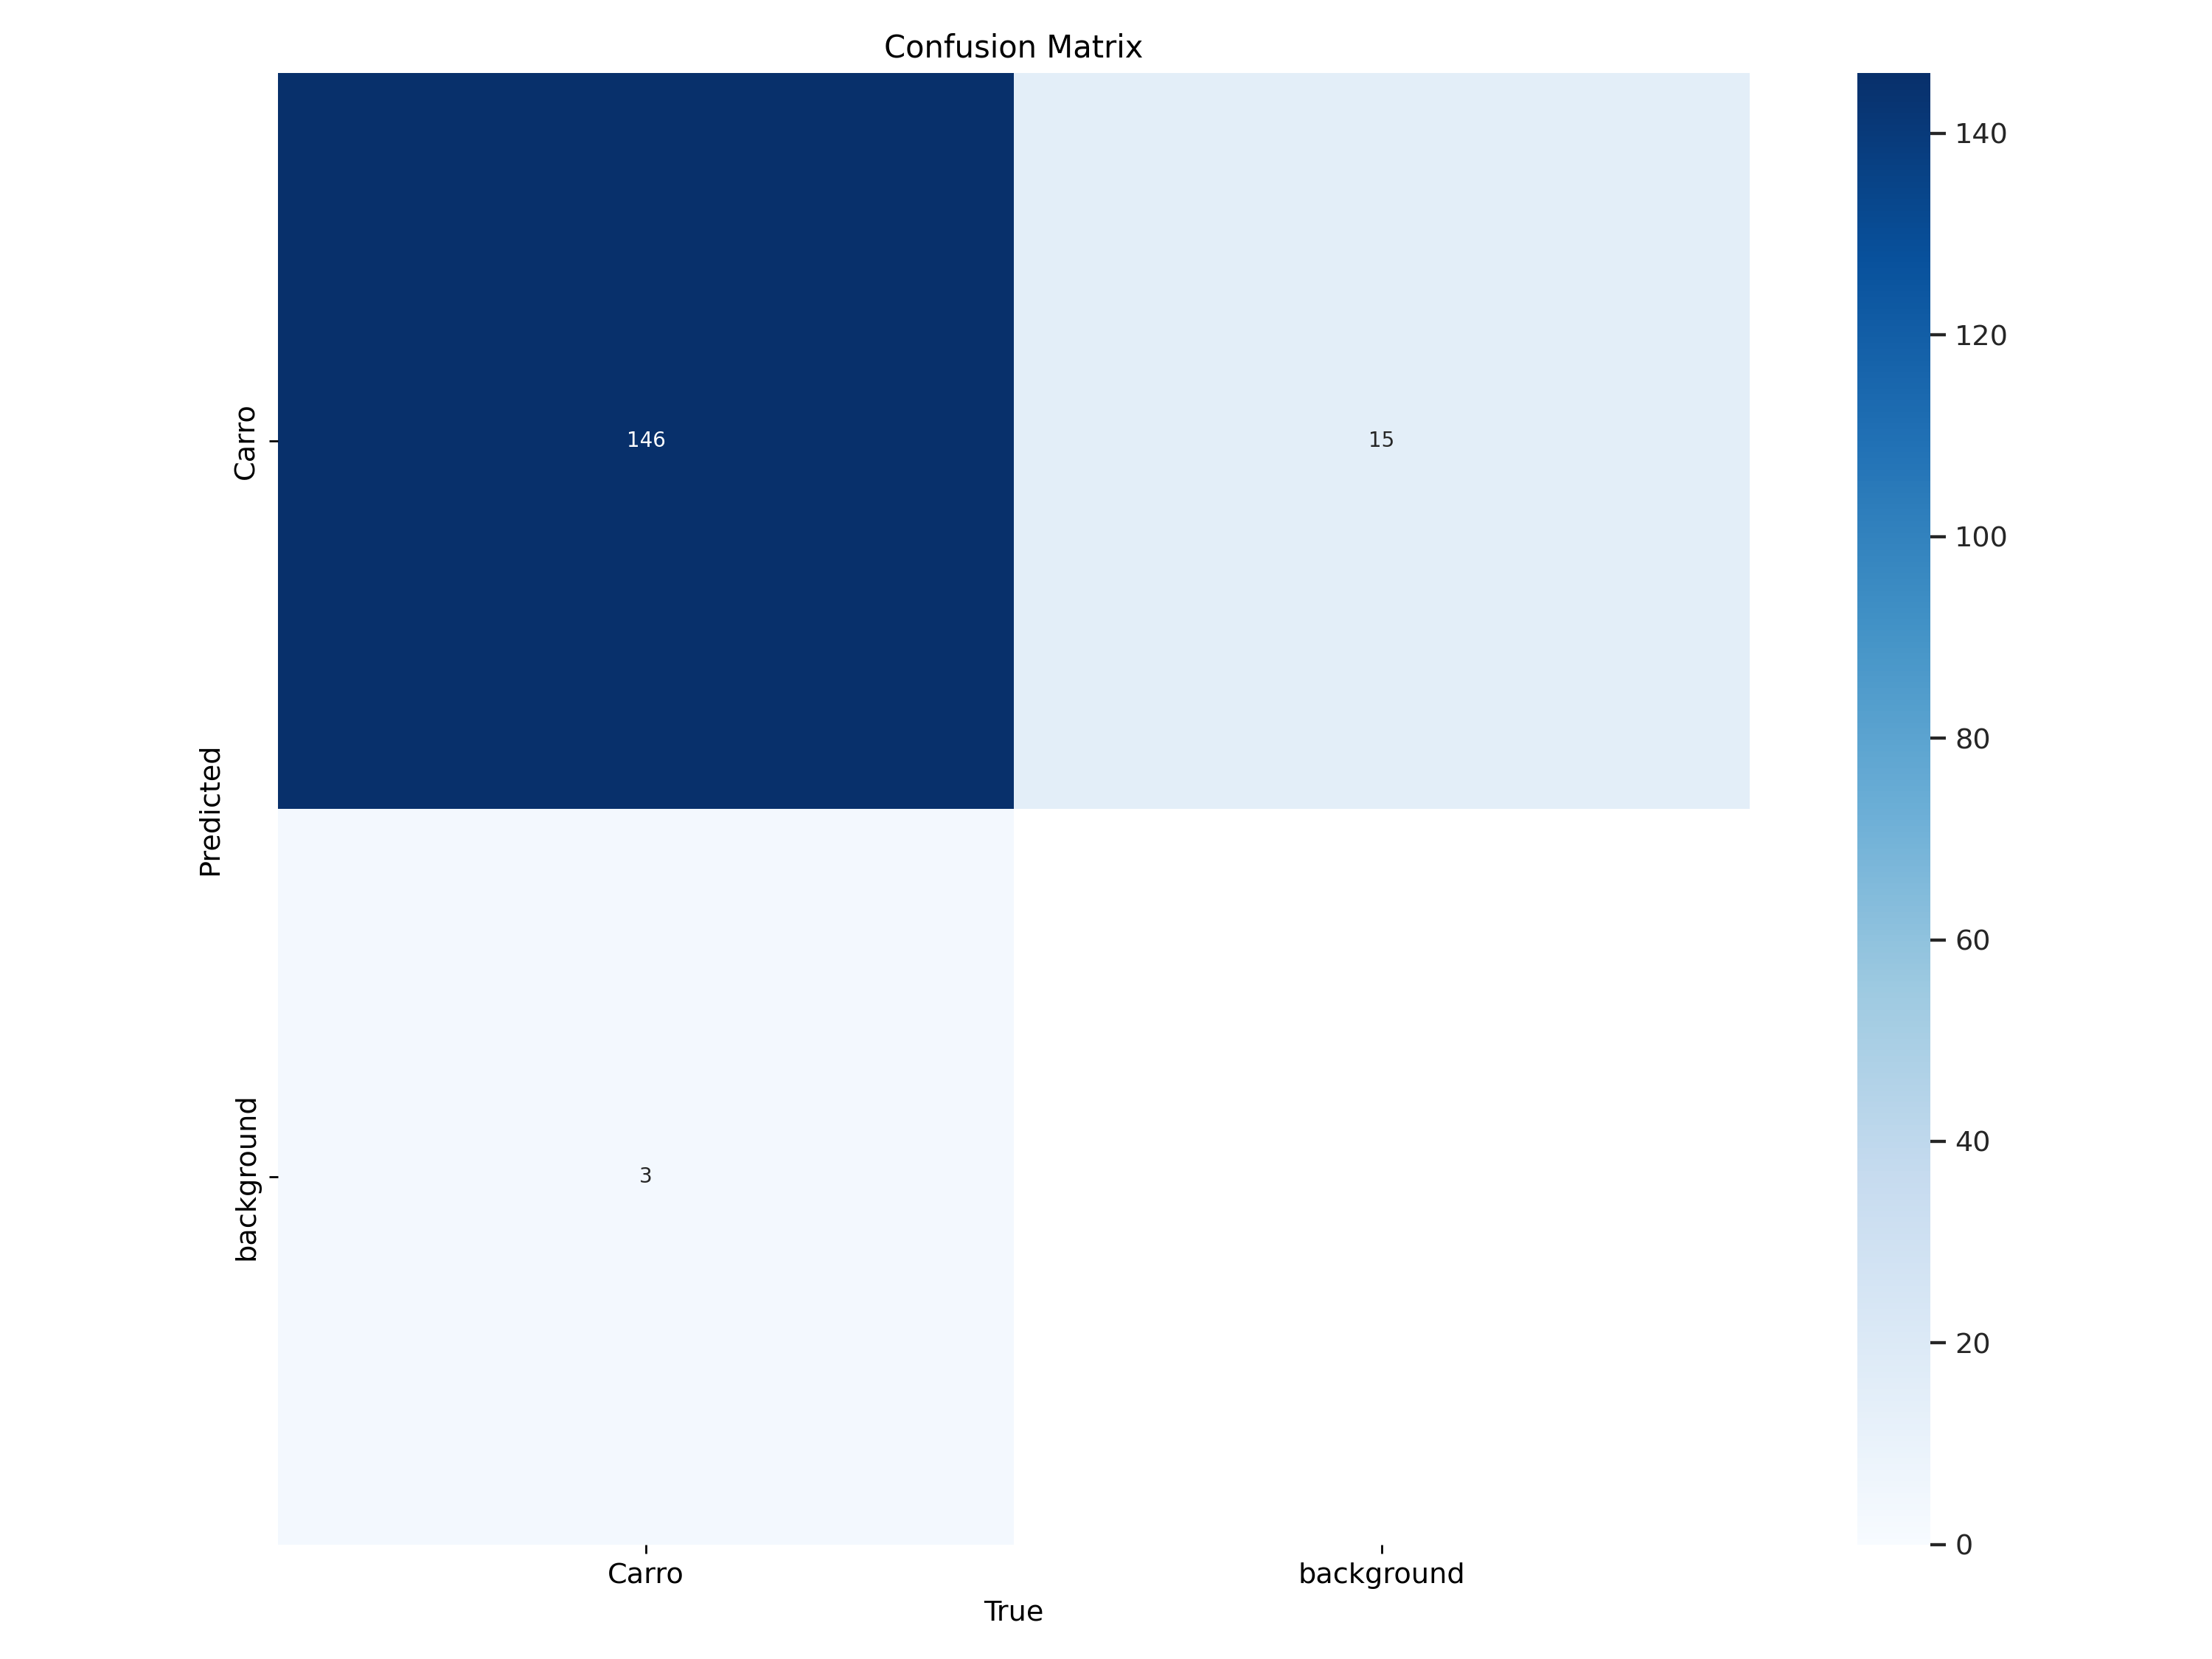

In [12]:
from IPython.display import Image, display
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1200)

/content


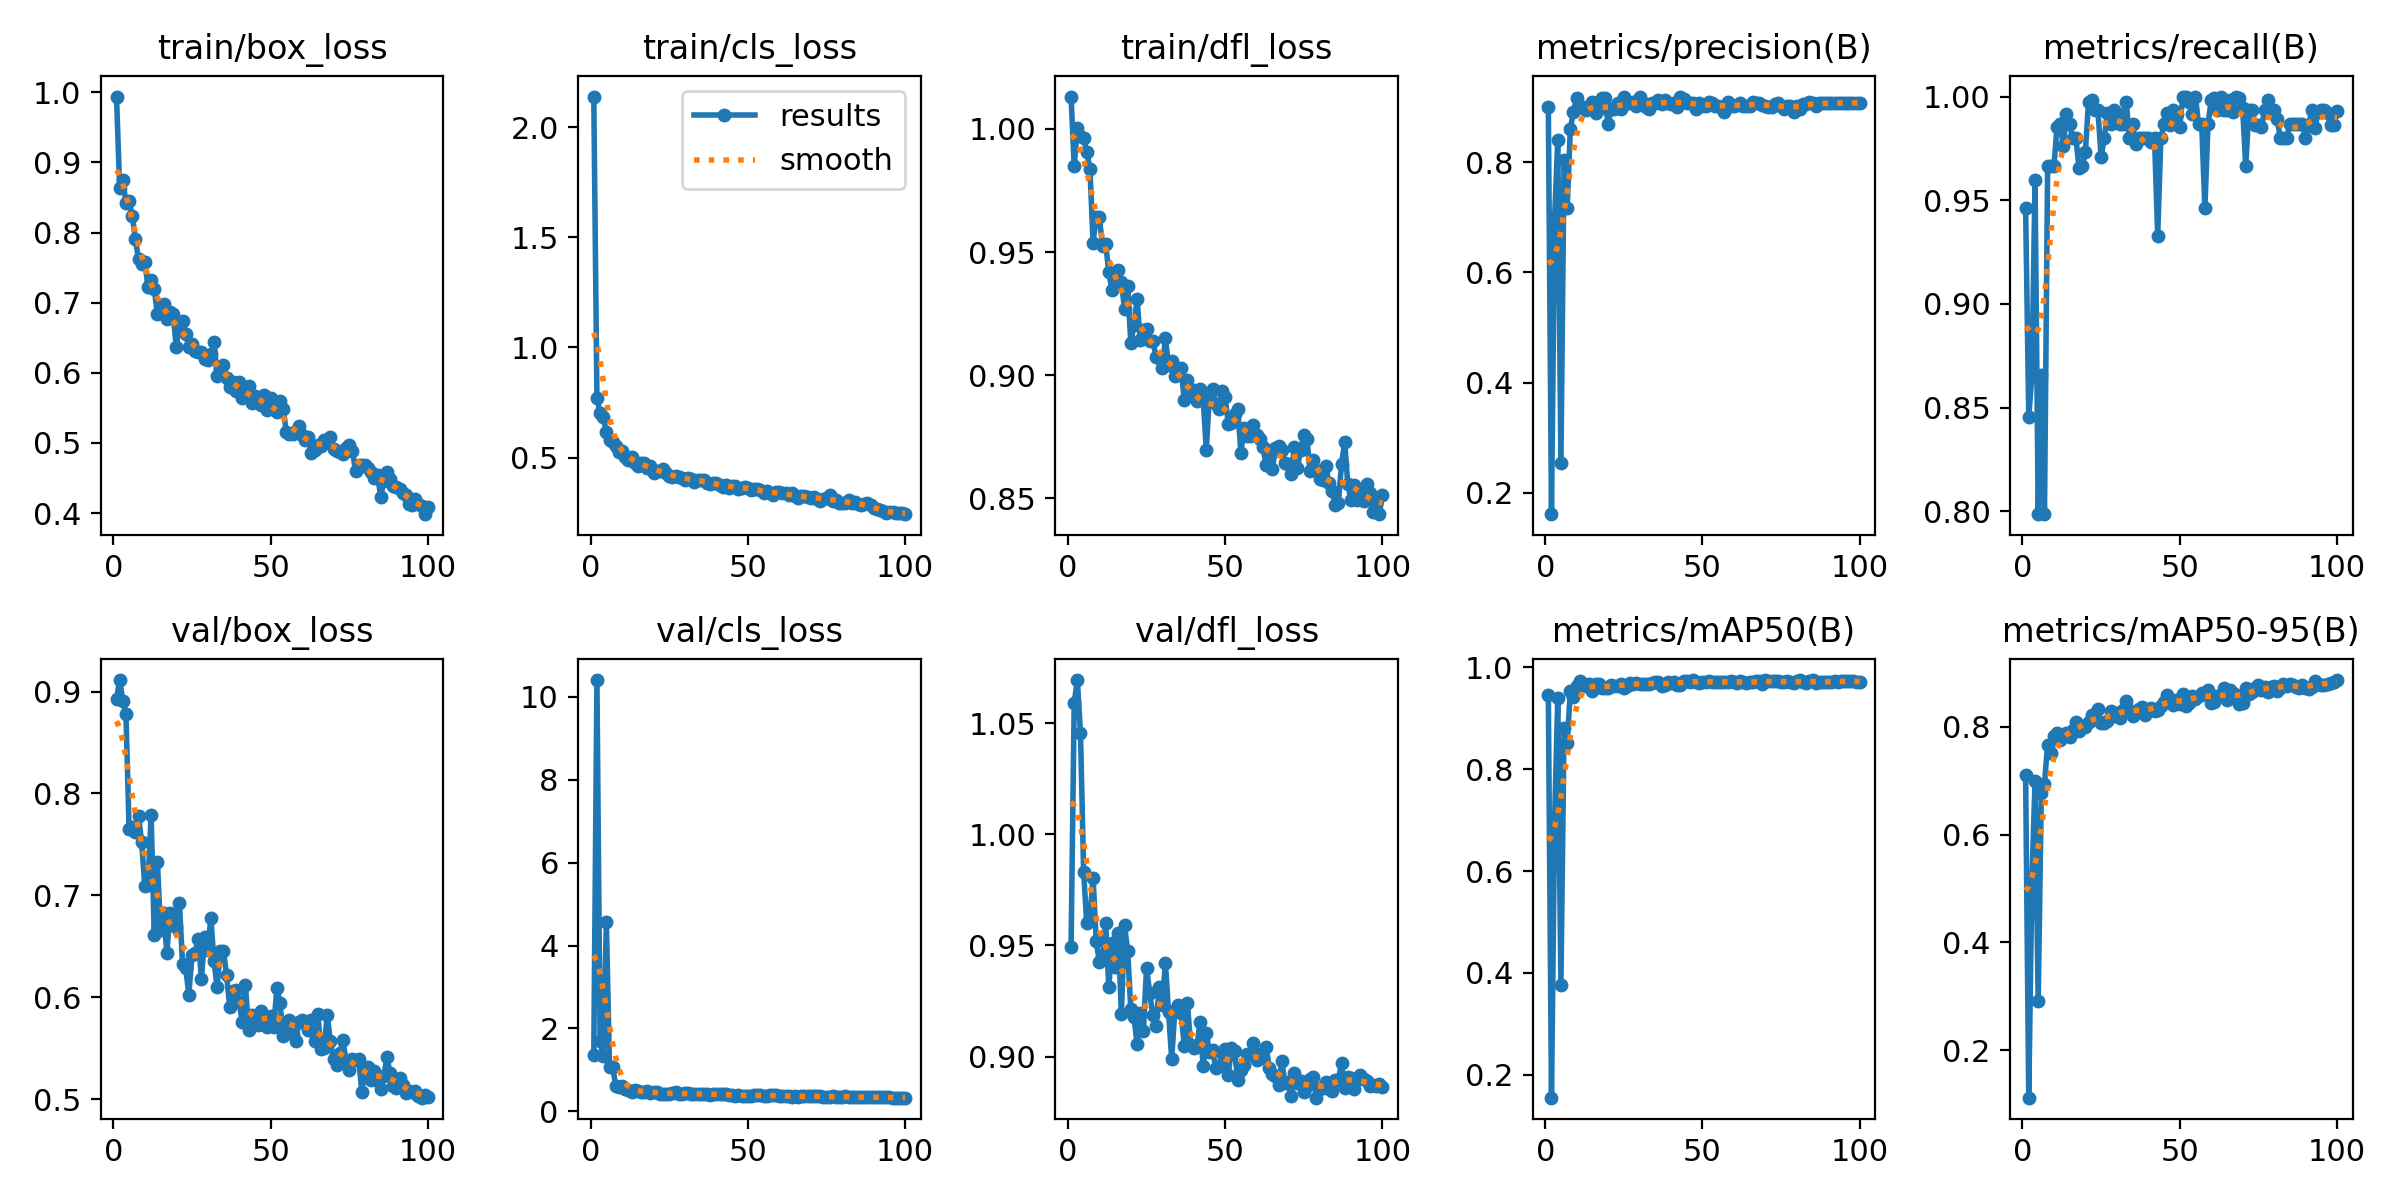

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

/content


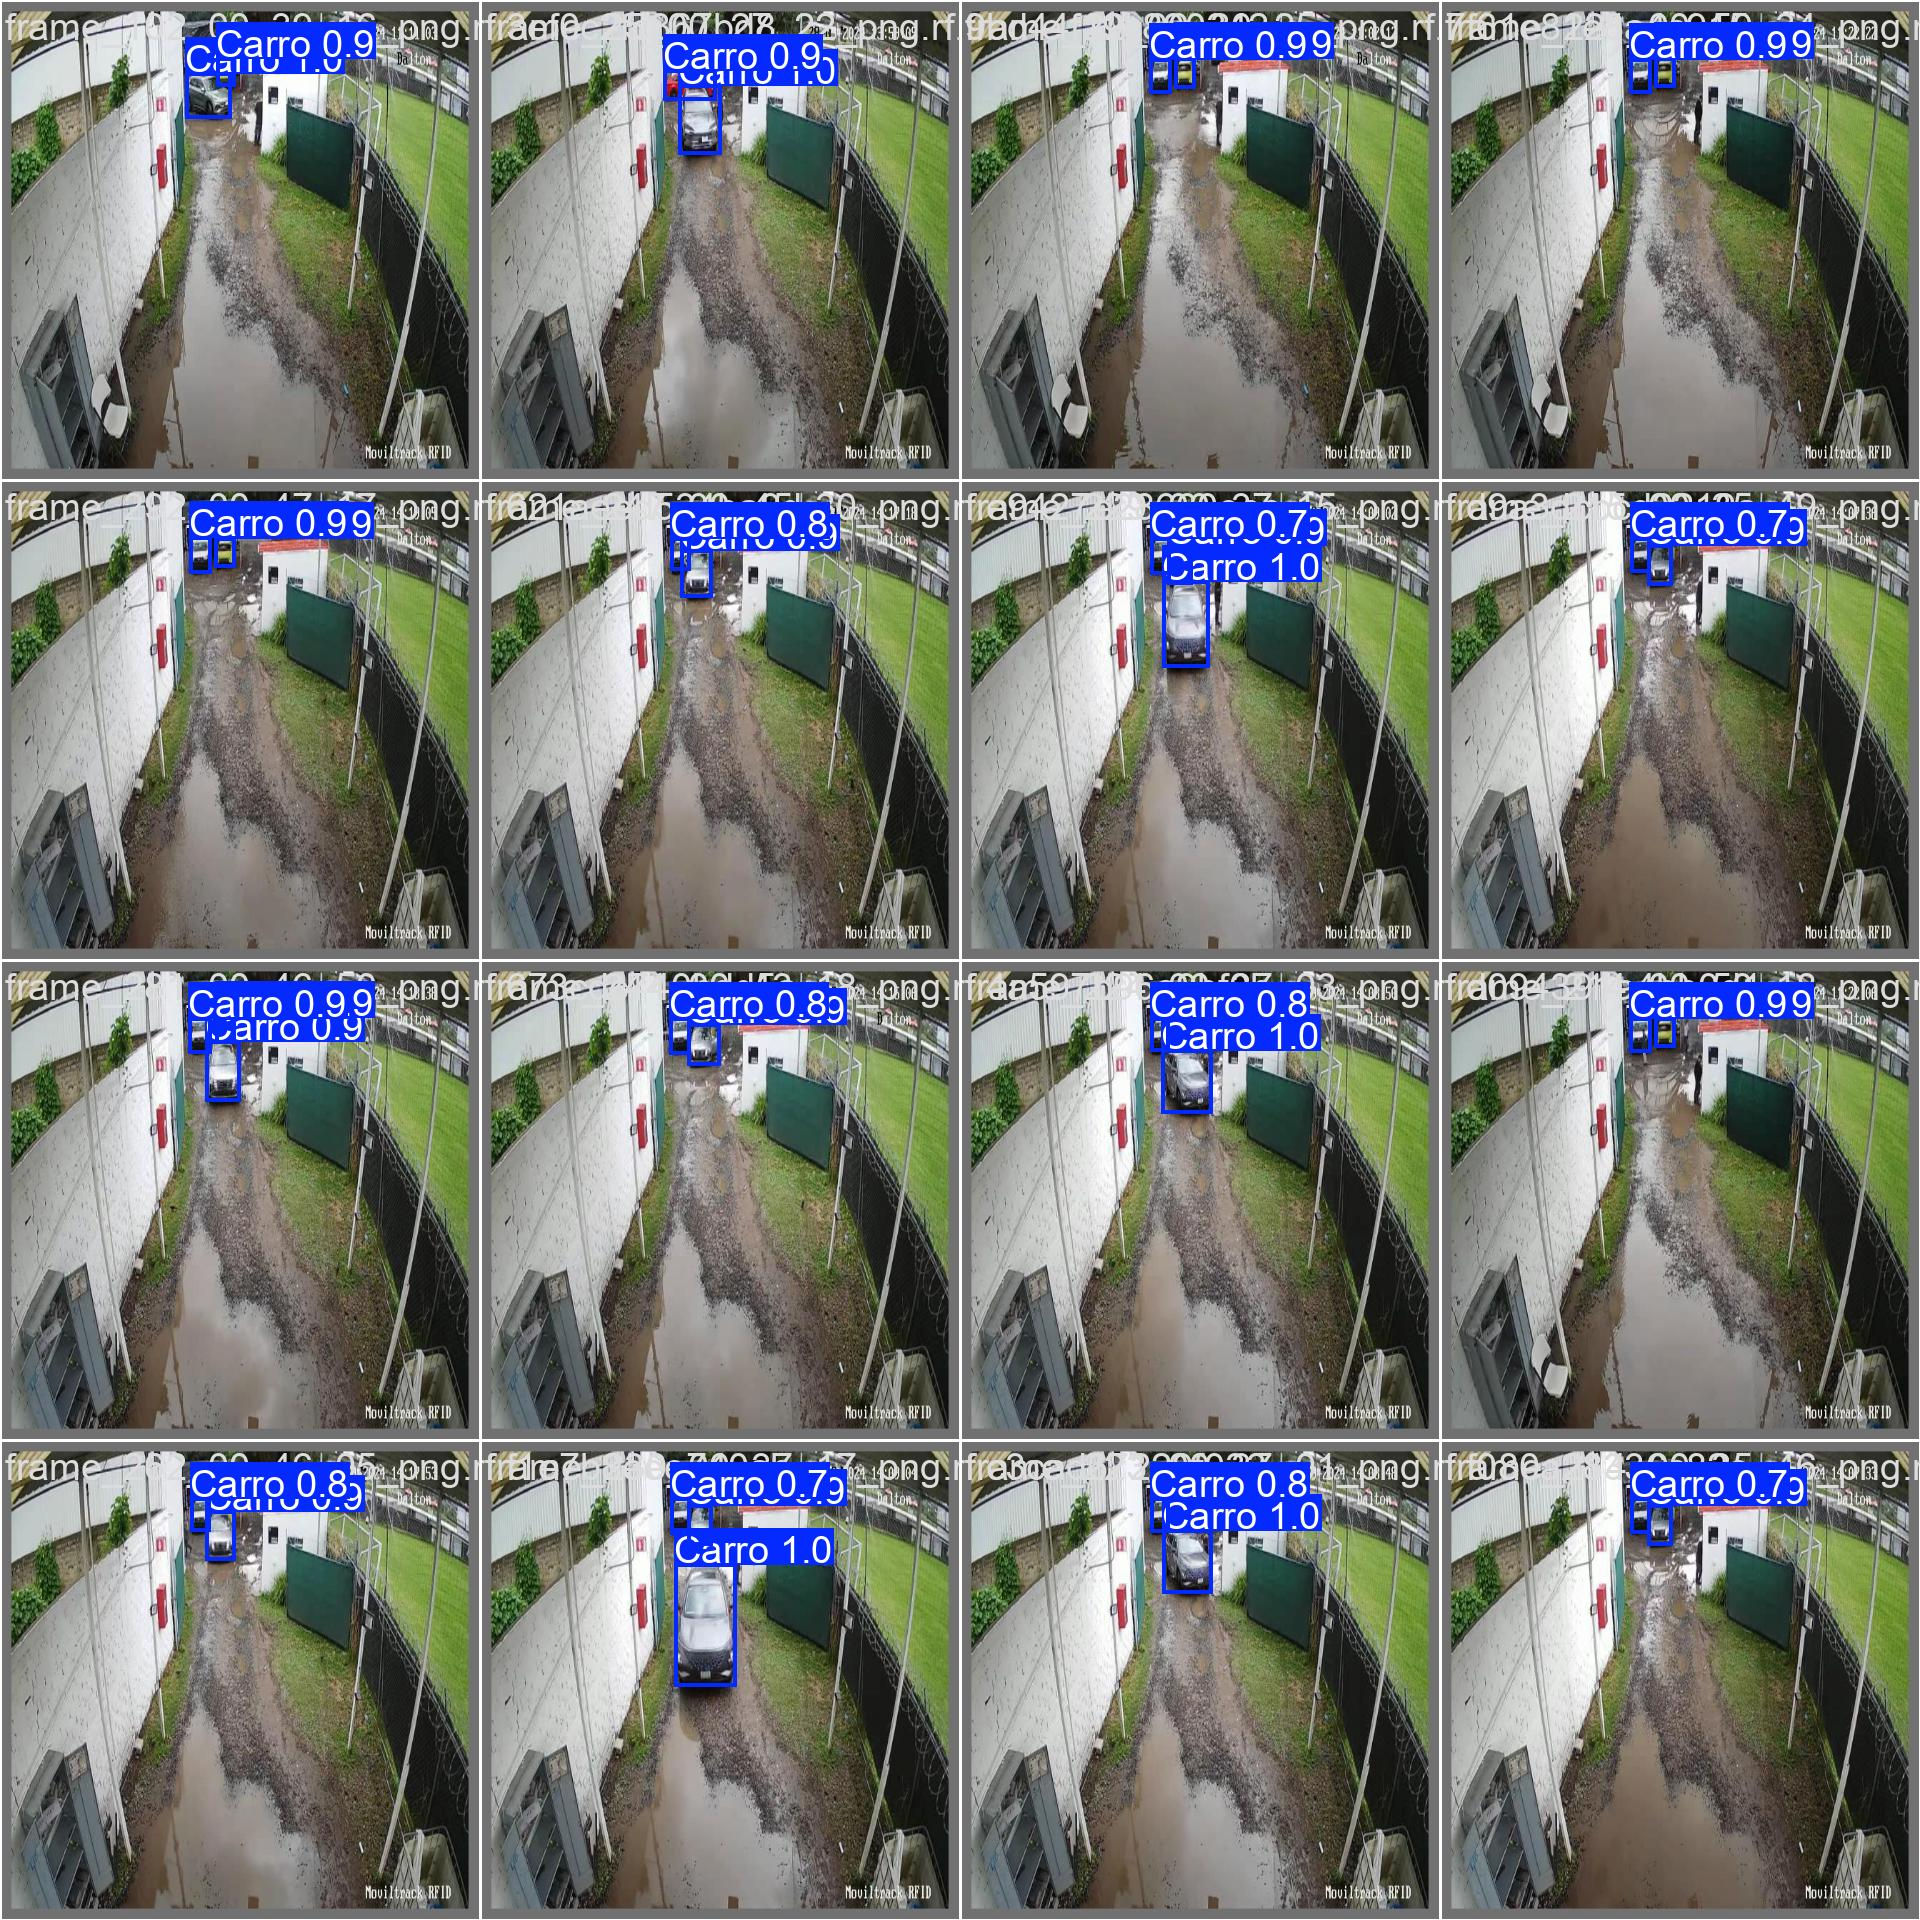

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.35s/it]
                   all         49       1174      0.928      0.741      0.825      0.547
                  ball         45         45      0.868      0.289      0.415      0.217
            goalkeeper         38         39      0.948      0.846      0.967      0.632
                player         49        973      0.977      0.962      0.988      0.749
               referee         49        117      0.919      0.867      0.931       0.59
Speed: 18.5ms preprocess, 26.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_3_6_png.rf.d031da4f257bbf91daf9845051fb9487.jpg: 800x800 1 ball, 19 players, 3 referees, 23.4ms
image 2/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_9_3_png.rf.509869506accd728341d8426de2f937a.jpg: 800x800 20 players, 1 referee, 22.9ms
image 3/25 /content/datasets/football-players-obj-detection-2/test/images/40cd38_7_6_png.rf.57bcce20df01cee3811f2b3576481f41.jpg: 800x800 1 goalkeeper, 20 players, 1 referee, 22.8ms
image 4/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_1_5_png.rf.ec272c23ac9c73ba68d85a630b6d2a22.jpg: 800x800 1 goalkeeper, 23 players, 2 referees, 22.8ms
image 5/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_5_5_png.rf.3fecd509745cf069d

**NOTE:** Let's take a look at few results.

In [17]:
# Export to ONNX
model.export(format='onnx')


Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 156.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 281.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 230.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 245.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 279.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.2s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for up

'runs/detect/train/weights/best.onnx'

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8s", model_path=f"{HOME}/runs/detect/train/")